<a href="https://colab.research.google.com/github/milindmore/BITS_MFDS_EndSem/blob/main/Assigment2_problemStatement20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Financial sentiment analysis research
#Section I

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import os

def compare_strings(string1, string2):
    pattern = re.compile(string2)
    match = re.search(pattern, string1)

    if match:
      return True
    else:
        return False


#filename=compare_strings("milindmorey","milind")
#print(filename)
filepath="";
for dirname, _, filenames in os.walk('//content/sample_data'):
    for filename in filenames:
      if  True == compare_strings(filename,"FinancialSentimentAnalysis") :
        filepath=os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))

print(filepath)



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
!pip install catboost
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
df = pd.read_csv(filepath)
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [34]:
def perform_eda(df):
    """
    Perform Exploratory Data Analysis (EDA) on financial sentiment analysis data.

    Parameters:
    df (DataFrame): The dataframe containing the data.

    Returns:
    None
    """
    # Display the shape of the dataframe
    print('\nShape of the dataframe:', df.shape, '\n')

    # Print the head of the dataframe
    print("Head of the dataframe:")
    print(df.head())

    # Print general information about the dataframe
    print("\nInformation of the dataframe:")
    print(df.info())

    # Print summary statistics of the numerical columns of the dataframe
    print("\nSummary statistics of the numerical columns:")
    print(df.describe())

    # Print a countplot of Sentiment
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Sentiment', data=df)
    plt.title('Distribution of Sentiments')
    plt.show()



def tweet_len(tweet):
    """
    Calculate the length of a tweet after removing stopwords.

    Args:
    tweet (str): The input tweet.

    Returns:
    int: The length of the tweet after removing stopwords.
    """
    # Remove non-alphabetic characters
    letters_only = re.sub('[^a-zA-Z]', ' ', tweet)

    # Convert to lowercase and split into words
    words = letters_only.lower().split()

    # Get the set of English stopwords
    stops = set(stopwords.words('english'))

    # Filter out stopwords
    meaningful_words = [w for w in words if w not in stops]

    # Return the length of meaningful words
    return len(meaningful_words)

def tweet_to_words(tweet):
    """
    Convert a tweet to a string of meaningful words (excluding stopwords).

    Args:
    tweet (str): The input tweet.

    Returns:
    str: A string containing meaningful words.
    """
    # Remove non-alphabetic characters
    letters_only = re.sub('[^a-zA-Z]', ' ', tweet)

    # Convert to lowercase and split into words
    words = letters_only.lower().split()

    # Get the set of English stopwords
    stops = set(stopwords.words('english'))

    # Filter out stopwords
    meaningful_words = [w for w in words if w not in stops]

    # Join the meaningful words back into a single string
    return ' '.join(meaningful_words)


Shape of the dataframe: (5842, 2) 

Head of the dataframe:
                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral

Information of the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB
None

Summary statistics of the numerical columns:
                                                 Sentence Sentiment
count                                                5842      5842
unique                                   

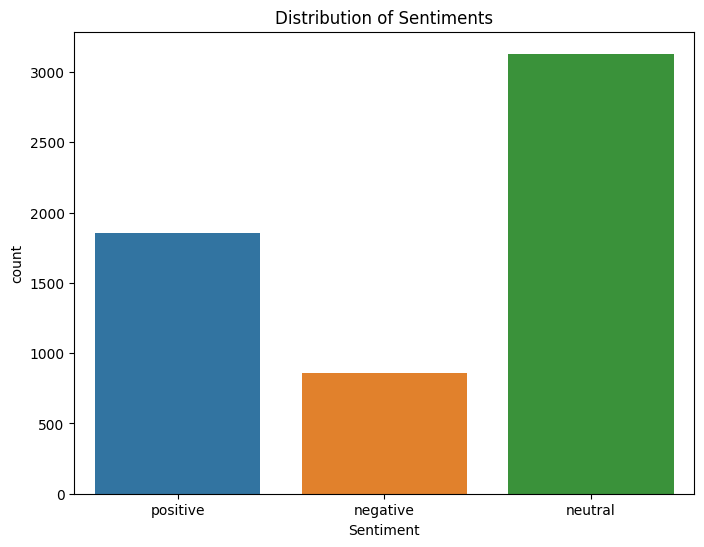

In [35]:
# Perform EDA
perform_eda(df)

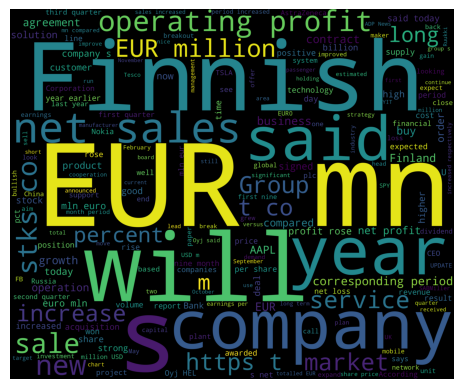

In [37]:
# Sentiment Positive
df1 = df[df['Sentiment']=='positive']
words = ' '.join(df1['Sentence'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])
wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

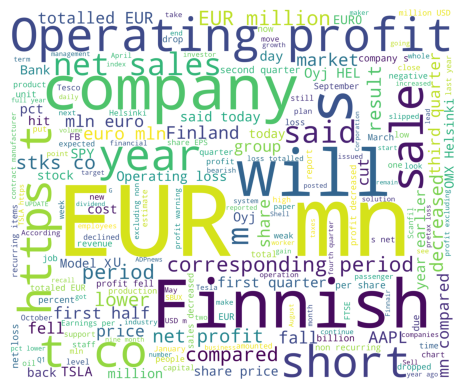

In [38]:
# Sentiment Negative

df2 = df[df['Sentiment']=='negative']
words = ' '.join(df2['Sentence'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

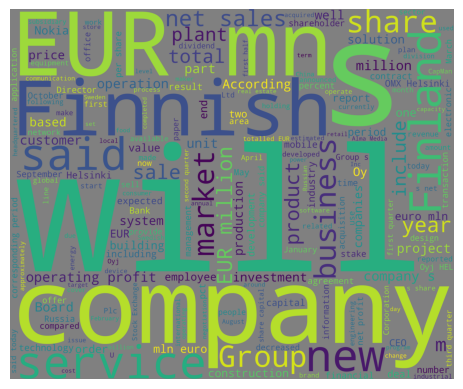

In [39]:
# Sentiment Neutral

df3 = df[df['Sentiment']=='neutral']
words = ' '.join(df3['Sentence'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='gray',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [40]:
#Count information per category
plot1=df.groupby(by=["Sentence","Sentiment"]).count().reset_index()
plot1

,Sentence,Sentiment
0,"#Apple breaks major support, here are some lev...",negative
1,#Apple up almost 20% from its February lows wi...,positive
2,#Fintech provider $CAFN Cachet Financial Solut...,positive
3,#FusionIQ NEW Positive Timing Signal on $SBUX ...,positive
4,#LongPos $TSLA 256 Break-out thru 50 & 200- DM...,positive
...,...,...
5831,volatility squeeze in $AAPL. I hope it gets re...,neutral
5832,what #stocks large players are selling http://...,negative
5833,what is up with $HK..... from Jan to now it's ...,negative
5834,www.countryelements.co.uk Designed by Patricia...,neutral


In [41]:
# Preprocessing steps:
# - 'Sentiments': Assigns 0 for 'negative' sentiment and 1 for other sentiments.
# - 'clean_tweet': Applies 'tweet_to_words' function to clean and process the tweet text.
# - 'tweet_length': Calculates the length of the cleaned tweet.

df['Sentiments'] = df['Sentiment'].apply(lambda x: 0 if x=='negative' else 1)
df['clean_tweet'] = df['Sentence'].astype(str).apply(lambda x: tweet_to_words(x))
df['tweet_length'] = df['Sentence'].astype(str).apply(lambda x: tweet_len(x))

# Splitting the data into training and testing sets:
# - train_data: 80% of the data for training.
# - test_data: 20% of the data for testing.
# - Random seed of 123 for reproducibility.

train_data, test_data = train_test_split(df, test_size=0.2, random_state=123)

In [42]:
# Extracting cleaned tweets for training and testing data:
# - train_clean_tweet: List containing cleaned tweets from the training data.
# - test_clean_tweet: List containing cleaned tweets from the testing data.

train_clean_tweet = []
for tweet in train_data['clean_tweet']:
    train_clean_tweet.append(tweet)

test_clean_tweet = []
for tweet in test_data['clean_tweet']:
    test_clean_tweet.append(tweet)

In [43]:
# Using CountVectorizer to convert text data into a matrix of token counts:

from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
v = CountVectorizer(analyzer='word')

# Convert cleaned tweets into feature vectors
train_features = v.fit_transform(train_clean_tweet)
test_features = v.transform(test_clean_tweet)

In [44]:
# List of Classifiers with Different Algorithms:

Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
    CatBoostClassifier(verbose=False),
    SGDClassifier()
]

In [45]:
# Model Training and Evaluation

dense_features = train_features.toarray()
dense_test = test_features.toarray()

# Initialize lists to store model names and their respective accuracies
Accuracy = []
Model = []

# Iterate through each classifier
for classifier in Classifiers:
    try:
        # Try fitting the classifier with sparse features
        fit = classifier.fit(train_features, train_data['Sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        # If there's an exception, fit the classifier with dense features
        fit = classifier.fit(dense_features, train_data['Sentiment'])
        pred = fit.predict(dense_test)

    # Calculate accuracy and append to lists
    accuracy = accuracy_score(pred, test_data['Sentiment']) * 100
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of ' + classifier.__class__.__name__ + ' is ' + str(accuracy) + '%')

Accuracy of LogisticRegression is 52.3524379811805%
Accuracy of KNeighborsClassifier is 54.31993156544055%
Accuracy of DecisionTreeClassifier is 59.366980325064155%
Accuracy of RandomForestClassifier is 62.27544910179641%
Accuracy of AdaBoostClassifier is 65.61163387510693%
Accuracy of GaussianNB is 53.37895637296835%
Accuracy of CatBoostClassifier is 66.89478186484175%
Accuracy of SGDClassifier is 64.67065868263472%


In [46]:
# Create a DataFrame to store model names and their respective accuracies
result = pd.DataFrame({'Models': Model})

# Add the Accuracy column
result['Accuracy'] = Accuracy

# Sort the DataFrame by Accuracy in descending order
result = result.sort_values(by='Accuracy', ascending=False)

# Display the result
result

,Models,Accuracy
6,CatBoostClassifier,66.894782
4,AdaBoostClassifier,65.611634
7,SGDClassifier,64.670659
3,RandomForestClassifier,62.275449
2,DecisionTreeClassifier,59.366980
1,KNeighborsClassifier,54.319932
5,GaussianNB,53.378956
0,LogisticRegression,52.352438


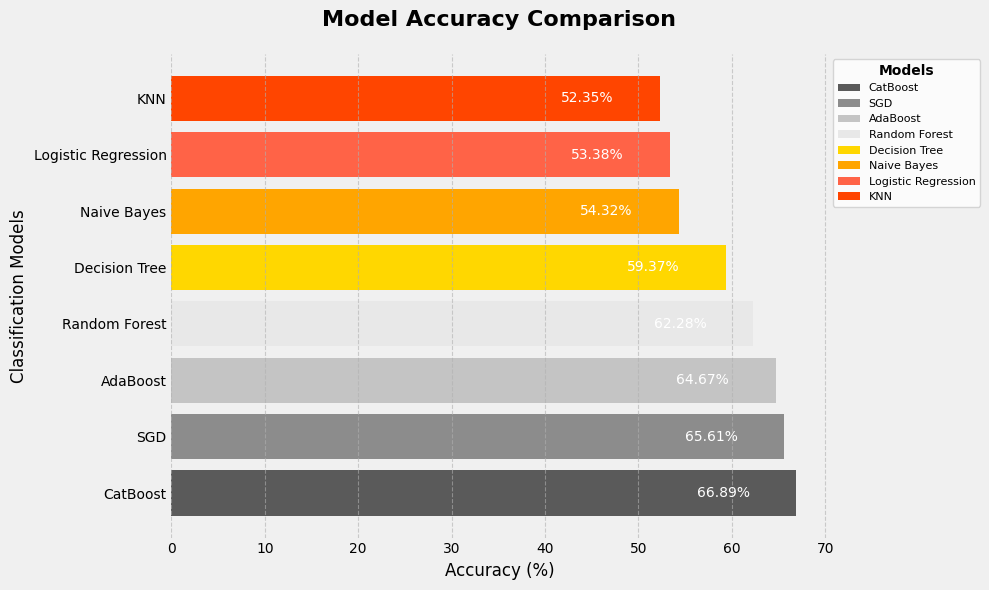

In [47]:
# Set a custom color palette
custom_palette = ['#5A5A5A', '#8C8C8C', '#C4C4C4', '#E8E8E8', '#FFD700', '#FFA500', '#FF6347', '#FF4500']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the models and their corresponding accuracies
Models = ['CatBoost', 'SGD', 'AdaBoost', 'Random Forest',
          'Decision Tree', 'Naive Bayes', 'Logistic Regression', 'KNN']
Accuracy = result['Accuracy']

# Create a horizontal bar plot with custom colors
bars = ax.barh(Models, Accuracy, color=custom_palette)

# Add text labels for each bar
for bar in bars:
    width = bar.get_width()
    ax.text(width - 5, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', ha='right', color='white', fontsize=10)

# Add a creative background
ax.set_facecolor('#F0F0F0')
fig.patch.set_facecolor('#F0F0F0')

# Set plot title, labels, and style
ax.set_title('Model Accuracy Comparison', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Accuracy (%)', fontsize=12)
ax.set_ylabel('Classification Models', fontsize=12)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove ticks
ax.tick_params(axis='both', which='both', length=0)

# Add grid lines
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Manually create the legend
legend_labels = ['CatBoost', 'SGD', 'AdaBoost', 'Random Forest', 'Decision Tree', 'Naive Bayes', 'Logistic Regression', 'KNN']
legend_rects = [plt.Rectangle((0,0),1,1,fc=custom_palette[i], edgecolor = 'none') for i in range(len(legend_labels))]
legend = plt.legend(legend_rects, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title='Models', title_fontsize=10, fontsize=8)
plt.setp(legend.get_title(), fontweight='bold')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight', transparent=True)

# Show the plot
plt.show()

**Graph Description**
In the provided code, we created a horizontal bar chart to visually compare the performance of different machine learning models. Each bar represents the accuracy of a specific classification model, including CatBoost, SGD, AdaBoost, Random Forest, Decision Tree, Naive Bayes, Logistic Regression, and KNN. The use of a custom color palette and an engaging background enhances the visual appeal of the plot. To facilitate easy reference, the accuracy percentages are displayed on the right side of each bar. We've customized spines, ticks, and grid lines to remove any unnecessary elements, resulting in a clean and informative visualization. Finally, the plot is saved as 'model_comparison.png' for future reference





**Graph Analysis**
In the provided code, we created a horizontal bar chart to visually compare the performance of different machine learning models. Each bar represents the accuracy of a specific classification model, including CatBoost, SGD, AdaBoost, Random Forest, Decision Tree, Naive Bayes, Logistic Regression, and KNN. The use of a custom color palette and an engaging background enhances the visual appeal of the plot. To facilitate easy reference, the accuracy percentages are displayed on the right side of each bar. We've customized spines, ticks, and grid lines to remove any unnecessary elements, resulting in a clean and informative visualization. Finally, the plot is saved as 'model_comparison.png' for future reference


**Importance of NLP**

Utilizing natural language processing and machine learning techniques, financial sentiment analysis proves to be a robust tool. It delves into textual data related to financial markets, news, and social media, providing investors, traders, and financial institutions with invaluable insights. These insights encompass market trends, investor sentiment, and potential movements within the market.

**Why Sentiment analysis tools**
Sentiment analysis tools, through the processing of extensive unstructured data from diverse sources, have the capacity to offer timely and pertinent information that supplements conventional financial analysis. This, in turn, can result in better-informed investment choices, refined risk management strategies, and a heightened competitive advantage in the financial markets.

**Effectiveness of financial sentiment analysis**
Furthermore, financial sentiment analysis has the potential to identify emerging trends, detect market anomalies, and even predict market movements to some extent. It allows for quicker reactions to breaking news and events that may impact financial markets. Additionally, it can help in understanding public perception, which is crucial in an era where social media and online discussions can have a significant impact on market sentiment.

**Summery of sentiment analysis**
sentiment analysis offers valuable insights, it should be employed in conjunction with other fundamental and technical analyses. Moreover, the precision and efficacy of sentiment analysis models may be influenced by variables like data quality, model complexity, and the particular domain under examination. In summary, financial sentiment analysis has showcased its capability to serve as a valuable resource for financial experts, furnishing an extra stratum of information and analysis to bolster investment and trading choices.


